# Principal Component Analysis (PCA)

Let us consider a dataset D in $m$ dimensional space having $n$ samples. Mathematically, $D=\{x_i,y_i\}$ where $x_i \in R^m$ and $y_i \in R^1$. In PCA we are not bothered about the target variable. Principal component analysis assumes that 
* some of the variables (or features) in D are having linear correlations and 
* each variable is normally distributed

Both the assumptions may be quite untrue for many different situations when PCA outcomes are not very reliable. However, it has been seen that in many practical scenario, PCA works nicely. Through this notebook, we would see the mathematical foundation behind PCA. PCA is going to be explained using linear algebra. We would try to understand PCA using a two dimensional data set for better visualizations, leading to better understanding.


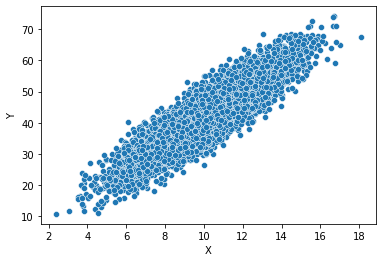

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(20)
x = np.random.normal(10,2, size=10000)
y = 4*x + np.random.normal(2,4, size=10000)

z = np.c_[x,y]

sns.scatterplot(x=x,y=y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In the above figure, even though $X$ and $Y$ look orthogonal to each other, as per the data, they are quite linearly correlated. So, here comes the problem:

* Is it possible to extract a new basis such that the dimensions are orthogonal to each other?

This is a two dimensional space and any two vectors which are not collinear, would form a basis. Technically speaking, there could be infinite number of such vectors as shown below

<b> Rotation Matrix: </b> It is given by
$$\Big[\begin{matrix} cos\theta  & -sin\theta\\ sin\theta & cos\theta \end{matrix}\Big]$$ 


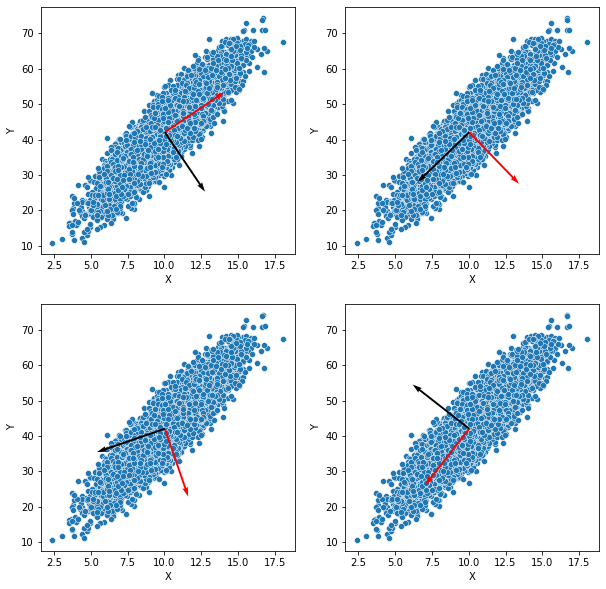

In [8]:
def rotation_mat(angle=30):
    rad_angle = angle*np.pi/180
    return np.array([[np.cos(rad_angle), -np.sin(rad_angle)],
                    [np.sin(rad_angle), np.cos(rad_angle)]])

x_mean = x.mean()
y_mean = y.mean()

plt.figure(figsize=(10,10))

for i in range(1,5):
    angle = np.random.randint(10,180)
    u = np.dot(np.array([10,10]), rotation_mat(angle=angle))
    v = np.dot(np.array([10,-10]), rotation_mat(angle=angle))
    plt.subplot(2,2,i)
    sns.scatterplot(x=x,y=y)
    plt.quiver([x_mean, x_mean], [y_mean, y_mean], u, v, [3,10], 
               scale=50, cmap='flag')
    plt.xlabel("X")
    plt.ylabel("Y")
plt.show()

The red and the black arrows give two directions (for the data set in the example). Each and every data point can be projected on these two vectors. You might have a question, why  $x\_mean$  and $y\_mean$ in the code? From each data point if $[x\_mean, y\_mean]$ is subtracted, the data will be centered, meaning that the origin is shifted to the centroid of the data. This shifting will not distort the oriendtation of data points but it will create new coordinates of the data points. Let, $x_i^{(n)}$ and $y_i^{(n)}$ be the new coordinates of the $i^{th}$ data points after the centering operations. Let the newly formed data set is denoted as $X$.

Since the original data was lying in an $m$ dimensional feature space, an new basis with orthogonal vectors of unit length can be created having same number of dimensions as the original dimension $m$. The new basis vectors would form a $m\times m$ matrix which can be considered as a transformation matrix. 

Let this $m \times m$ matrix be $U$ such that:

$$U=\left[
  \begin{matrix}
    | & | & | & & &|\\
    u_1 & u_2 & u_3 & . & . & u_m \\
     |& | & | & & &| \\
  \end{matrix}
\right] \\ $$

It is to be understood that $u_j$, where $j = 1, 2, 3 ... m$, is a column vector of shape $m\times 1$. It is also to be understood that each $x_i^{(n)}$ is a row vector of shape $1\times m$. Hence, a projection of $x_i^{(n)}$ on the the unit vector $u_j$ is given by $$a_i=\left<x_i^{(n)},u_j \right>=x_i^{(n)}.u_j\\ $$. Here $\left<.\right>$ is the inner product of the vectors which is the dot product of the two vectors. Since $X$ contains $n$ data points, projection of each data point on the $u_j$ unit vector is given by: $$\ \\ [a_1, a_2,a_3,...,a_n]=Xu_j\\ $$. Note that $X$ has a shape $n\times m$ and $u_j$ has a shape $m\times 1$ and hence their dot product will produce a matrix of shape $n\times 1$ which is given by $[a_i]$ where $i=1,2,3,...n$. All the $a_i$ values are lying along the axis formed by the unit vector $u_j$. Hence, variance of data along $u_j$ is given by: $$\ \\ \sigma_j^2=\frac{1}{n-1}\sum_{i=1}^n\left(a_i-\bar a\right)^2\ \ \ \ \ [\bar a\ is\ the\ mean\ of\ all\ a_i\ values]\\ $$Since $X$ is the centered data and $a_i$ scores are the projection of $X$ along a unit vector $u_j$, mean of $a_i$ will be $0$. Hence,
$$\begin{align} 
\sigma_j^2&=\frac{1}{n-1}\sum_{i=1}^n\left(a_i-\bar a\right)^2 \\ 
&= \frac{1}{n-1}\sum_{i=1}^n\left(a_i-0\right)^2 \\ 
&= \frac{1}{n-1}\left(||Xu_j||^2\right) \\ 
&= \frac{1}{n-1}\left(Xu_j\right)^T(Xu_j) \\
&= \frac{1}{n-1} u_j^TX^TXu_j \\ 
&= u_j^T\left(\frac{1}{n-1}(X^TX) \right)u_j \\ 
&= u_j^TS u_j\\ 
\end{align} \\ $$ where $S=\left(\frac{1}{n-1}(X^TX) \right)$ is the covariance matrix of shape $m\times m$. Out of infinitely many different directions of $u_j$, the optimal direction is that along which the variance is maximized. This is where the problem turns out to be a constrained optimization problem $$u_j^*=\operatorname*{argmax}_{u_j} \left(u_j^TSu_j\right)\ \ \ subject\ to\ \ u_j^Tu_j=1 \\ $$ This constrained optimization problem can be solved using the method of Lagranges Multiplier by creating a new optimization function as shown below $$L(u_j)=u_j^TS u_j-\lambda(u_j^Tu_j-1)\ \\ $$ Differentiating $L(u_j)$, partially with respect to $u_j$ gives
$$\ \\ \begin{align} \frac{\partial {L(u_j)}}{\partial {u_j}} &= \frac{\partial}{\partial {u_j}}\left(u_j^TS u_j-\lambda(u_j^Tu_j-1)\right) \\ 
&=u_j^T(S+S^T)-\lambda(2u_j^T) \\ 
&=2u_j^TS-2\lambda u_j^T\end{align}\\ $$Equating the above partial differentiation to $0$ leads to $$\ \\ 2u_j^TS-2\lambda u_j^T=0$$
$$\begin{align}&\implies\ \ \ \ u_j^TS=\lambda u_j^T \\ 
&\implies\ \ \ \ (u_j^TS)^T=(\lambda u_j^T)^T \\ 
&\implies\ \ \ \ S^Tu_j=\lambda u_j \\ 
&\implies\ \ \ \ Su_j=\lambda u_j\end{align} \\ $$
The covariance matrix $S$ is a square symmetric matrix for which $S=S^T$. The expression $Su_j=\lambda u_j$ suggests that the optimal direction of $u_j$ can be found out by the eigen decomposition of the covariance matrix. This optimal direction is one of the principal components. This is the reason why Principal Component Analysis finally boils down to eigen decomposition of the covariance matrix.

# Significance of eigenvalues and eigenvectors in PCA

We have seen above that 
$\sigma_j^2=u_j^TSu_j$ and $Su_j=\lambda u_j$ for optimal $u_j$. From these two equations we can see,
$$\sigma_j^2=u_j^TSu_j=u_j^T\lambda u_j=\lambda u_j^Tu_j=\lambda \\ $$ The above expression suggests that the eigenvalue is, in essence, the variance explained along the direction of the principal component $u_j$. Hence, for a $m$ dimensional data set, there would be at most $m$ principal components and the corresponding eigenvalues signify the variance explained by the principal components. Moreover, since the covariance matrix is a square symmetric matrix, eigenvectors of this matrix would be orthogonal to each other. Thus, the eigenvectors give the direction of the principal component and eigenvalues (the scaling factor) gives the amount of variance explained by the respective principal component.

# Covariance matrix is often a bad choice!

In an $m$ dimensional data set, it is quite possible that one variable is having much higher variance than the other variables. In such situations, the first principal component will have very high eigenvalue compared to others. That is why, a better matrix for PCA is not the covariance matrix but the standardized covariance matrix, i.e. correlation matrix because in this matrix, variance of each variable is scaled down to 1.  

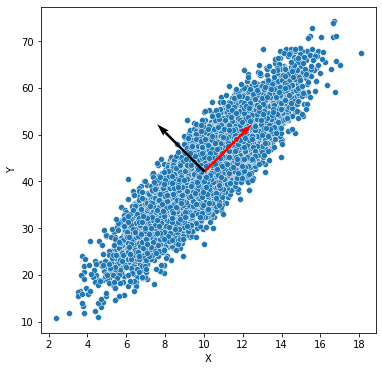

In [10]:
# find correlation coefficient of z
cor_mat = np.corrcoef(z, rowvar=False)
eig_val, eig_vec = np.linalg.eig(cor_mat)
plt.figure(figsize=(6,6))
sns.scatterplot(x=x,y=y)
plt.quiver([x_mean, x_mean], [y_mean, y_mean],  eig_vec[0,:], eig_vec[1,:], 
           [3,10], scale=5, cmap='flag')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [12]:
cor_mat

array([[1.        , 0.89171494],
       [0.89171494, 1.        ]])

In [17]:
df = pd.DataFrame(data=z, columns=['a','b'])
df.corr()

,a,b
a,1.000000,0.891715
b,0.891715,1.000000


# PCA for dimension reduction

<p>PCA will render ineffective if the variables are uncorrelated because then the correlation matrix would look like an identity matrix suggesting that the data is spread uniformly along all the dimensions. But, if there is correlations, this would mean that the data is more spread along some directions and quite less along some other directions. PCA, through eigen decomposition of the correlation matrix, tries to find a new basis which aligns itself along the direction of the spread of the data. </p>
It is also seen above that the eigenvalues signify the variance explained by the principal components. Let us consider a correlation matrix $C$

$$C=\left[
        \begin{matrix}
            1 & \rho_{12} & \rho_{13} & ... & \rho_{1m} \\
            \rho_{21} & 1 & \rho_{23} & ... & \rho_{2m} \\
            \rho_{31} & \rho_{32} & 1 & ... & \rho_{3m} \\
            &&.\\
            &&.\\
            \rho_{m1} & \rho_{m2} & \rho_{m3} & ... & 1
        \end{matrix}
\right] \\ $$

Trace of the matrix $C$ is equal to the sum of its diagonal elements i.e. $trace(C)=m$ which is equal to the sum of all eigenvalues $\lambda_j$ where $j=1,2,3...m$. Therefore, $$trace(C)=m=\sum_{j=1}^m\lambda_j = Total\ variance\ explained\\ $$
If the eigenvalues $(\lambda_j)$ are sorted in descending order (which is usually the case), there are three different methods through which we can extract the final components:
* Extract all the eigenvectors for which the eigenvalue is greater than 1 (Kaisen criteria)
* Extract first $k$ eigenvectors such that $\frac{\sum_{j=1}^k\lambda_j}{\sum_{j=1}^m\lambda_j}\ge \tau$ where $\tau$ is a threshold between $[0,1]$, usually in the range $0.6-0.8 $
* Extract $k$ eigenvectors based on analyst's requirements


In [7]:
print("Eigenvalues are: {}".format(np.round(eig_val,3)))
print("Cummulative Proportion of variance explained: {}".format(np.round(eig_val.cumsum()/eig_val.sum(),3)))

Eigenvalues are: [1.892 0.108]
Cummulative Proportion of variance explained: [0.946 1.   ]
